# Introduction
* YOU HAVE TO run cell in "Download Images" to prepare images for the code following.

This notebook contains:
1. sample code for reading, writing, and displaying image with opencv
2. programming exercises (from Section 3)



# 1. Download images 

In [1]:
%%shell

# RUN THIS CELL

###############################################################################################################
## Guidelines for sharing files
## 1. share a file (here, zip) with "anyone with link" in GoogleDrive
## 2. copy the link, here: https://drive.google.com/file/d/1qpoaVMI68ve23awAVAefM6352_1DE_rb/view?usp=sharing
## 3. extract the file-id, here: 1qpoaVMI68ve23awAVAefM6352_1DE_rb
## 4. download the file-id with gdown, as follows
###############################################################################################################

IMAGES="1qpoaVMI68ve23awAVAefM6352_1DE_rb"
cd /content/
rm -rf images.zip
rm -rf images
gdown -q --id $IMAGES --output images.zip
unzip -q images.zip
rm -rf images.zip

# 2. Code for reading, displaying and writing

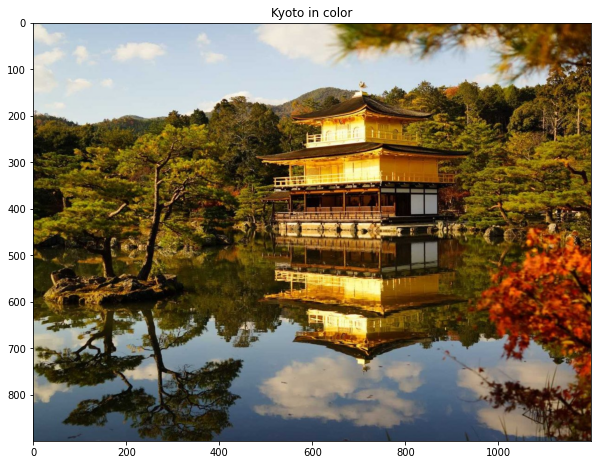

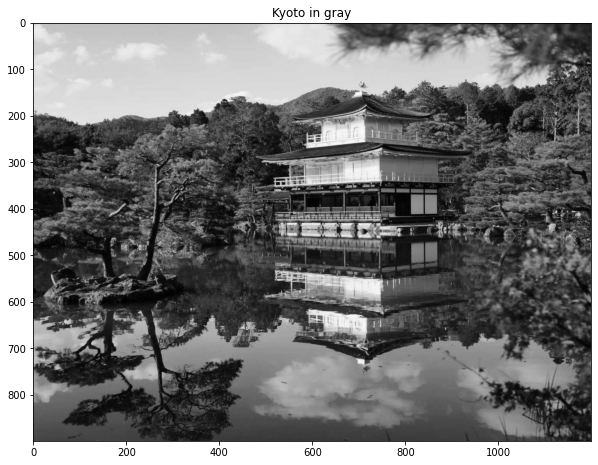

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

"""
read_image:
  color: True => reading as color image (default) in RGB format
  color: False => reading as gray
"""
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)


"""
if image_data is in color format then RGB must be used
"""
def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(10,8), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

image_rgb = read_image("./images/kyoto.jpg")
show_image(image_rgb, "Kyoto in color")
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# show_image(cv2.imread("./images/kyoto.jpg",0),'tesstter')
show_image(image_gray, "Kyoto in gray")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Calculating, normalizing, and displaying histogram

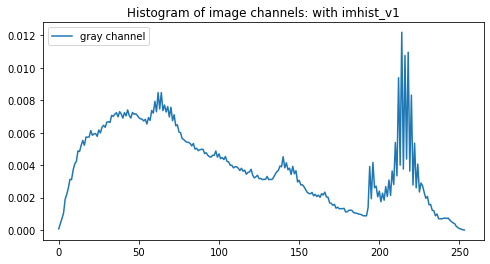

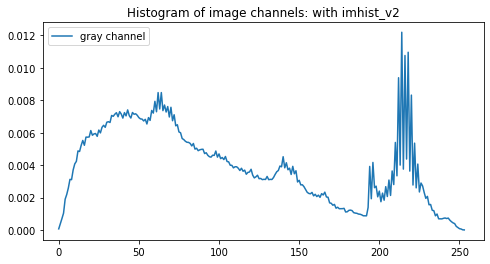

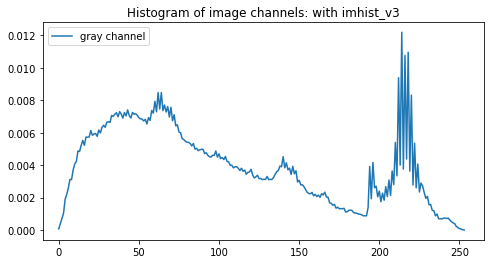

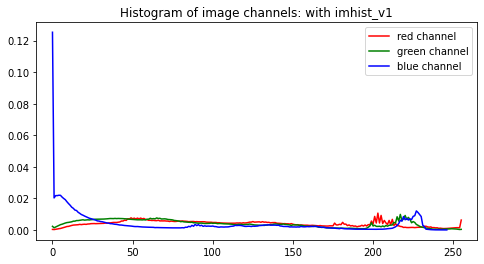

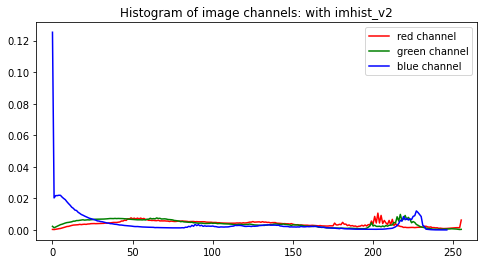

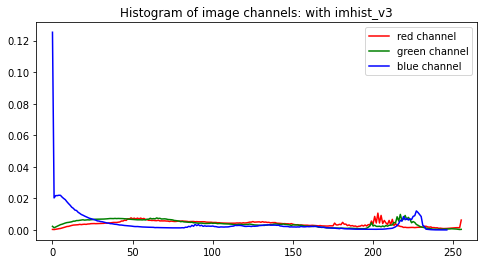

In [3]:
###############################################################################################################
## Fill your into YOUR CODE HERE
###############################################################################################################

#version 1: use opencv to calculate the histogram, API=cv2.calcHist
def imhist_v1(image, density=True):
  # YOUR CODE HERE
  a = image.shape
  total = (a[0]+1)*a[1]
  hist = None
  if (len(a)==2):
    hist = cv2.calcHist([image],[0],None,[256],[0,256])
  else:
    hist=[]
    hist += [i/ total for i in [cv2.calcHist([image],[0],None,[256],[0,256])]] #r
    hist += [i/ total for i in [cv2.calcHist([image],[1],None,[256],[0,256])]] #g
    hist += [i/ total for i in [cv2.calcHist([image],[2],None,[256],[0,256])]] #b
  return hist

#version 2: use numpy to calculate the histogram, with np.bincount
def imhist_v2(image, density=True):
  # YOUR CODE HERE
  a = image.shape
  hist = []
  total = (a[0]+1)*a[1]
  if (len(a)==2):
    hist += [m/total for m in np.bincount(np.array(image).flatten())]
  else:
    wot = [[],[],[]]
    for y in image:
      for x in y:
        for i,col in enumerate(x):
          wot[i] += [col]
    for i in wot:
      hist += [[m/total for m in np.bincount(np.array(i))]]
  return hist
  

#version 3: use numpy to calculate the histogram, with np.histogram
def imhist_v3(image_gray, density=True):
  # YOUR CODE HERE
  a = image.shape
  hist = None
  total = (a[0]+1)*a[1]
  if (len(a)==2):
    hist = [m/total for m in np.histogram(np.array(image).flatten(), bins=[value for value in range(0,256)])]
  else:
    wot = [[],[],[]]
    for y in image:
      for x in y:
        for i,col in enumerate(x):
          wot[i] += [col]
    for i in wot:
      hist += [[m/total for m in np.histogram(np.array(image).flatten(), bins=[value for value in range(0,256)])]]
  return hist

def show_img_histogram(hist,version,typeIMG='gray'):
  plt.figure(figsize=(7.9,4))
  plt.xlim([-10,265])
  if (typeIMG != 'gray'):
    color = ('r','g','b')
    colorful = ('red','green','blue')
    for i,col in enumerate(color):
      plt.plot(hist[i],color = col,label=colorful[i]+ ' channel')
  elif (typeIMG == 'gray'):
    plt.plot(hist,label='gray channel')
  
  plt.title('Histogram of image channels: with imhist_v'+str(version))
  plt.legend()
  plt.show()
show_img_histogram(imhist_v2(image_gray,False),1,'gray')
show_img_histogram(imhist_v2(image_gray,False),2,'gray')
show_img_histogram(imhist_v2(image_gray,False),3,'gray')
show_img_histogram(imhist_v2(image_rgb),1,'rgb')
show_img_histogram(imhist_v2(image_rgb),2,'rgb')
show_img_histogram(imhist_v2(image_rgb),3,'rgb')

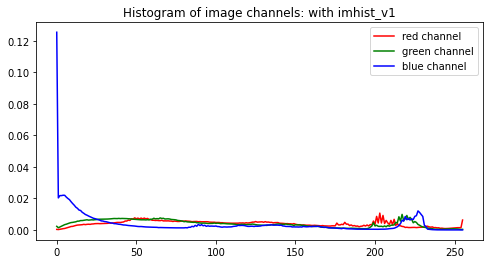

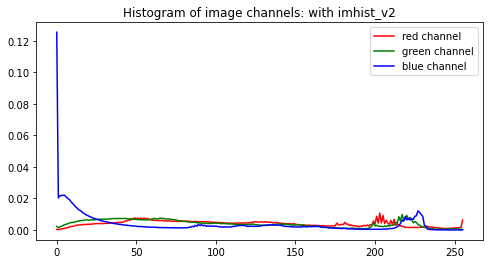

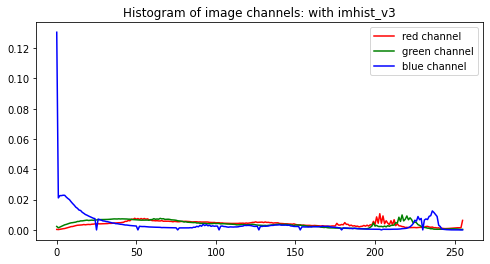

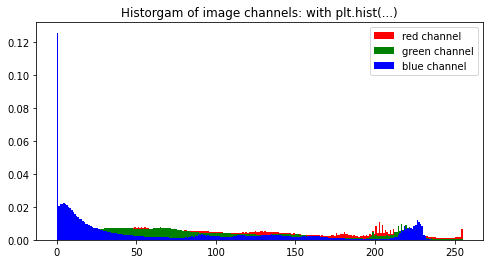

In [ ]:

# Show the histogram of the three channels of image "./images/kyoto.jpg"
# The the figure below

In [ ]:

# Image = "./images/kyoto.jpg"
# Create the following images

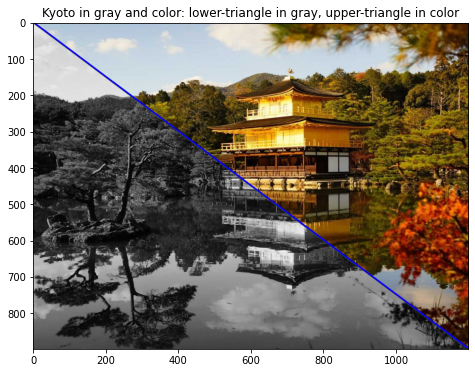

In [4]:
# Image = "./images/kyoto.jpg"
# Create the following images
imgSplit = image_rgb.copy()
height,width,depth = imgSplit.shape
start_point = (1, 1)
end_point = (width, height)
thickness = 3
rgb2k = np.array([0.114, 0.587, 0.299])
color = (0, 0, 255)
imgSplit = cv2.line(imgSplit, start_point, end_point, color, thickness)
for i in range(height):
  for j in range(width):
    if (i > float(j)*(height/width)+2):
      matrix_int = np.round(np.sum(imgSplit[i][j] * rgb2k, axis=-1)).astype('uint8')
      imgSplit[i][j] = matrix_int
    else: break
show_image(imgSplit, "Kyoto in gray and color: lower-triangle in gray, upper-triangle in color",figsize=(8,6))
  

In [6]:
def isInside(pX,pY,CordX,CordY,radius):
  if(pow(abs(pX-CordX),2)+pow(abs(pY-CordY),2) <= pow(radius,2)): return True
  return False

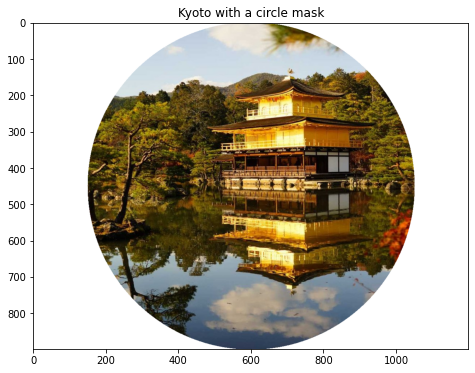

In [7]:
# Image = "./images/kyoto.jpg"
# Create the following images
#kyoto with a circle mask
height,width,depth = image_rgb.shape
white_img = np.zeros((height,width,depth),dtype='uint8')
white_img.fill(255)
x_cirA,y_cirA = np.arange(width),np.arange(height)
xv1,yv1 = np.meshgrid(x_cirA,y_cirA)
mask1 = (yv1 - 450)**2 + (xv1-600)**2 < 450**2
img_circle1 = image_rgb.copy()
white_img[mask1,:] = img_circle1[mask1,:]
show_image(white_img, 'Kyoto with a circle mask',figsize=(8,6))

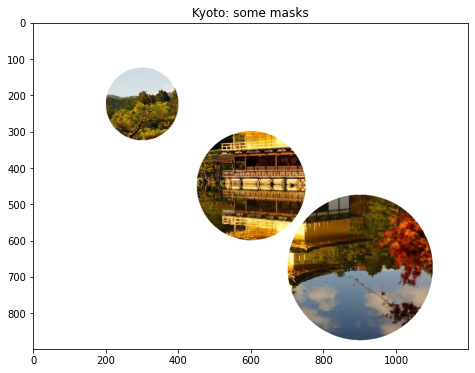

In [8]:
# Image = "./images/kyoto.jpg"
# Create the following images
imgCirle2 = image_rgb.copy()
height,width,depth = imgCirle2.shape
white = np.array([255,255,255]).astype('uint8')
for i in range(height):
  for j in range(width):
    if(not (isInside(j,i,0.25*width,0.25*height,100) or isInside(j,i,0.5*width,0.5*height,150) or isInside(j,i,0.75*width,0.75*height,200) )):
      imgCirle2[i][j] = white
show_image(imgCirle2, "Kyoto: some masks",figsize=(8,6))